In [1]:
import torch
import torch.nn as neural_net
import torch.optim as optimization
from torchvision import datasets, transforms
from torch.autograd import Variable
import torch.nn.functional as functional
import numpy as np
import matplotlib.pyplot as visualization
import os
import statistics as stats

In [2]:
torch.manual_seed(1)
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [3]:
def load_data(train_batch_size, test_batch_size):
    training_data = torch.utils.data.DataLoader(
        datasets.MNIST('data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.Resize((32, 32)),
                           transforms.ToTensor()
                       ])),
        batch_size=train_batch_size, shuffle=True)

    testing_data = torch.utils.data.DataLoader(
        datasets.MNIST('data', train=False, transform=transforms.Compose([
            transforms.Resize((32, 32)),
            transforms.ToTensor()
        ])),
        batch_size=test_batch_size, shuffle=True)

    return (training_data, testing_data)

In [4]:
class CNN(neural_net.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv_layer1 = neural_net.Conv2d(1, 6, 5)
        self.conv_layer2 = neural_net.Conv2d(6, 16, 5)
        self.fc_layer1 = neural_net.Linear(16 * 5 * 5, 120)
        self.fc_layer2 = neural_net.Linear(120, 84)
        self.fc_layer3 = neural_net.Linear(84, 10)

    def forward(self, input_data):
        input_data = functional.max_pool2d(functional.relu(self.conv_layer1(input_data)), 2)
        input_data = functional.max_pool2d(functional.relu(self.conv_layer2(input_data)), 2)
        input_data = input_data.view(input_data.size()[0], -1)
        input_data = functional.relu(self.fc_layer1(input_data))
        input_data = functional.relu(self.fc_layer2(input_data))
        input_data = self.fc_layer3(input_data)
        return input_data

In [5]:
def define_optimizer(cnn_model):
    return optimization.SGD(cnn_model.parameters(), lr=1e-2, momentum=0.9, nesterov=True)

In [6]:
def train_model(cnn_model, model_optimizer, training_loader):
    cnn_model.train()
    for batch_idx, (data_input, data_target) in enumerate(training_loader):
        data_input, data_target = Variable(data_input), Variable(data_target)
        model_optimizer.zero_grad()
        output = cnn_model(data_input)
        loss_value = loss_function(output, data_target)
        loss_value.backward()
        model_optimizer.step()

In [7]:
def calculate_loss(cnn_model, data_loader, loss_function):
    correct_predictions = 0
    total_predictions = 0
    total_loss = 0
    loss_counter = 0
    with torch.no_grad():
        for batch_data in data_loader:
            data_input, data_target = batch_data
            output = cnn_model(data_input)
            loss = loss_function(output, data_target)
            total_loss += loss
            loss_counter += 1
            for i, output_tensor in enumerate(output):
                if torch.argmax(output_tensor) == data_target[i]:
                    correct_predictions += 1
                total_predictions += 1
    return total_loss / loss_counter, round(correct_predictions / total_predictions, 3)

In [8]:
def compute(cnn_model, model_optimizer):
    training_loss_history = []
    testing_loss_history = []
    testing_accuracy_history = []
    training_accuracy_history = []
    for epoch in range(1, epochs + 1):
        train_model(cnn_model, model_optimizer, train_loader)
        train_loss, train_acc = calculate_loss(cnn_model, train_loader, loss_function)
        test_loss, test_acc = calculate_loss(cnn_model, test_loader, loss_function)
        print("TRAINING LOSS --> ", train_loss)
        training_loss_history.append(train_loss)
        testing_loss_history.append(test_loss)
        training_accuracy_history.append(train_acc)
        testing_accuracy_history.append(test_acc)
    return training_loss_history, testing_loss_history, training_accuracy_history, testing_accuracy_history

In [9]:
epochs = 15

In [10]:
torch.manual_seed(1)
loss_function = torch.nn.CrossEntropyLoss()
train_loader, test_loader = load_data(500, 500)
cnn_model_batch2 = CNN()
optimizer_batch2 = define_optimizer(cnn_model_batch2)
batch_2_train_loss, batch_2_test_loss, batch_2_train_acc, batch_2_test_acc = compute(cnn_model_batch2, optimizer_batch2)

batch_params_2 = torch.nn.utils.parameters_to_vector(cnn_model_batch2.parameters())

torch.manual_seed(1)
loss_function = torch.nn.CrossEntropyLoss()
train_loader, test_loader = load_data(100, 100)
cnn_model_batch1 = CNN()
optimizer_batch1 = define_optimizer(cnn_model_batch1)
batch_1_train_loss, batch_1_test_loss, batch_1_train_acc, batch_1_test_acc = compute(cnn_model_batch1, optimizer_batch1)

batch_params_1 = torch.nn.utils.parameters_to_vector(cnn_model_batch1.parameters())

TRAINING LOSS -->  tensor(1.4428)
TRAINING LOSS -->  tensor(0.2385)
TRAINING LOSS -->  tensor(0.1547)
TRAINING LOSS -->  tensor(0.1117)
TRAINING LOSS -->  tensor(0.0942)
TRAINING LOSS -->  tensor(0.0786)
TRAINING LOSS -->  tensor(0.0761)
TRAINING LOSS -->  tensor(0.0624)
TRAINING LOSS -->  tensor(0.0564)
TRAINING LOSS -->  tensor(0.0511)
TRAINING LOSS -->  tensor(0.0499)
TRAINING LOSS -->  tensor(0.0419)
TRAINING LOSS -->  tensor(0.0410)
TRAINING LOSS -->  tensor(0.0447)
TRAINING LOSS -->  tensor(0.0379)
TRAINING LOSS -->  tensor(0.1148)
TRAINING LOSS -->  tensor(0.0785)
TRAINING LOSS -->  tensor(0.0513)
TRAINING LOSS -->  tensor(0.0410)
TRAINING LOSS -->  tensor(0.0408)
TRAINING LOSS -->  tensor(0.0302)
TRAINING LOSS -->  tensor(0.0286)
TRAINING LOSS -->  tensor(0.0192)
TRAINING LOSS -->  tensor(0.0172)
TRAINING LOSS -->  tensor(0.0192)
TRAINING LOSS -->  tensor(0.0136)
TRAINING LOSS -->  tensor(0.0116)
TRAINING LOSS -->  tensor(0.0115)
TRAINING LOSS -->  tensor(0.0096)
TRAINING LOSS 

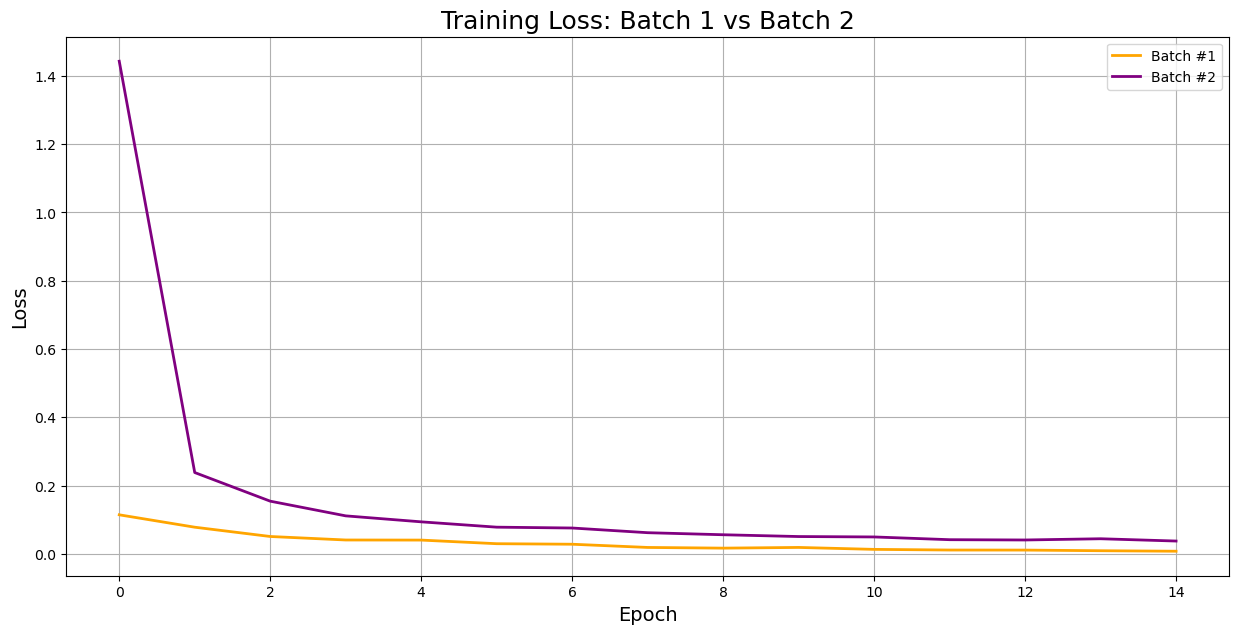

In [11]:
visualization.figure(figsize=(15, 7))
visualization.plot(np.arange(0, 15, 1), batch_1_train_loss, color="orange", linewidth=2)
visualization.plot(np.arange(0, 15, 1), batch_2_train_loss, color="purple", linewidth=2)
visualization.title('Training Loss: Batch 1 vs Batch 2', fontsize=18)
visualization.legend(['Batch #1', 'Batch #2'])
visualization.xlabel('Epoch', fontsize=14)
visualization.ylabel('Loss', fontsize=14)
visualization.grid(True)
visualization.show()

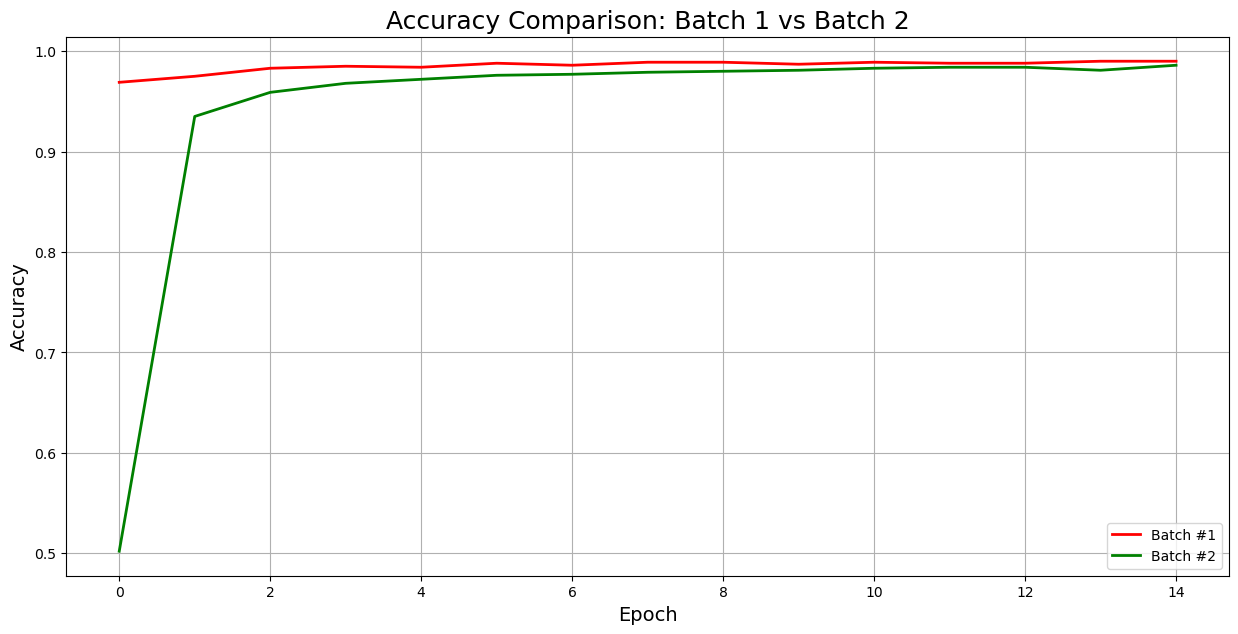

In [12]:
visualization.figure(figsize=(15, 7))
visualization.plot(np.arange(0, 15, 1), batch_1_test_acc, color="red", linewidth=2)
visualization.plot(np.arange(0, 15, 1), batch_2_test_acc, color="green", linewidth=2)
visualization.title('Accuracy Comparison: Batch 1 vs Batch 2', fontsize=18)
visualization.legend(['Batch #1', 'Batch #2'])
visualization.xlabel('Epoch', fontsize=14)
visualization.ylabel('Accuracy', fontsize=14)
visualization.grid(True)
visualization.show()

In [13]:
alpha = np.linspace(-2.0, 2.0, num=50)
theta_values = [(1 - a) * batch_params_1 + a * batch_params_2 for a in alpha]

In [14]:
train_loss_alpha, test_loss_alpha, train_acc_alpha, test_acc_alpha = [], [], [], []

In [16]:
for theta in theta_values:
    torch.manual_seed(1)
    model_alpha = CNN()
    torch.nn.utils.vector_to_parameters(theta, model_alpha.parameters())
    loss_fn = neural_net.CrossEntropyLoss()
    train_loss, train_acc = calculate_loss(model_alpha, train_loader, loss_function)
    test_loss, test_acc = calculate_loss(model_alpha, test_loader, loss_function)
    train_loss_alpha.append(train_loss)
    train_acc_alpha.append(train_acc)
    test_loss_alpha.append(test_loss)
    test_acc_alpha.append(test_acc)

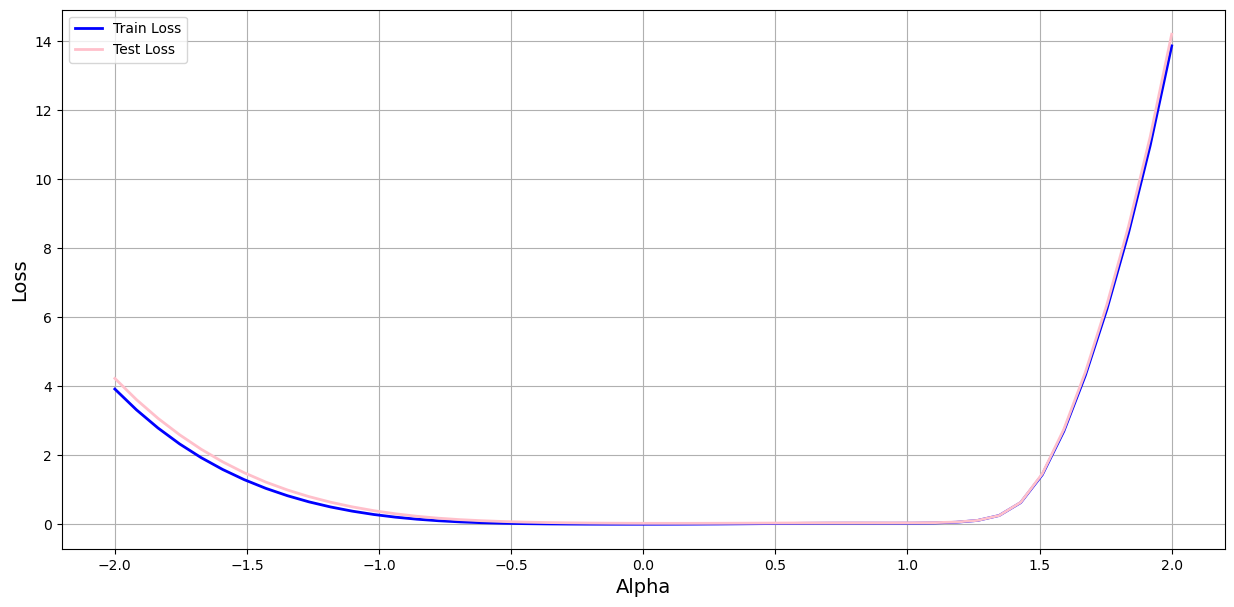

In [17]:
visualization.figure(figsize=(15, 7))
visualization.plot(alpha, train_loss_alpha, color="blue", linewidth=2)
visualization.plot(alpha, test_loss_alpha, color="pink", linewidth=2)
visualization.legend(['Train Loss', 'Test Loss'])
visualization.xlabel('Alpha', fontsize=14)
visualization.ylabel('Loss', fontsize=14)
visualization.grid(True)

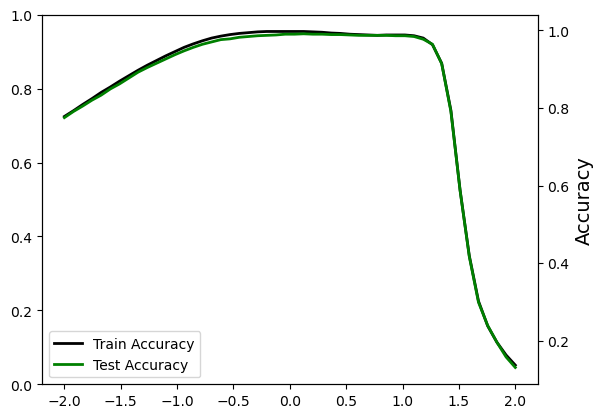

In [18]:
visualization.twinx()
visualization.plot(alpha, train_acc_alpha, color="black", linewidth=2)
visualization.plot(alpha, test_acc_alpha, color="green", linewidth=2)
visualization.legend(['Train Accuracy', 'Test Accuracy'])
visualization.ylabel('Accuracy', fontsize=14)
visualization.show()

In [20]:
alpha = np.linspace(-2.0, 2.0, num=50)
theta_values = []

for i in range(len(alpha)):
    theta = (1 - alpha[i]) * batch_params_1 + alpha[i] * batch_params_2
    theta_values.append(theta)

In [21]:
alpha_train_loss_arr = []
alpha_test_loss_arr = []
alpha_train_acc_arr = []
alpha_test_acc_arr = []

In [23]:
for i in range(len(theta_values)):
    torch.manual_seed(1)
    theta = theta_values[i]
    
    # Create a new model and set the parameters to theta
    interpolated_model = CNN()
    torch.nn.utils.vector_to_parameters(theta, interpolated_model.parameters())
    
    # Define loss function
    loss_function = neural_net.CrossEntropyLoss()

    # Calculate training and testing loss and accuracy
    alpha_train_loss, alpha_train_acc = calculate_loss(interpolated_model, train_loader, loss_function)
    alpha_test_loss, alpha_test_acc = calculate_loss(interpolated_model, test_loader, loss_function)
    
    # Append results to respective arrays
    alpha_train_loss_arr.append(alpha_train_loss)
    alpha_train_acc_arr.append(alpha_train_acc)
    alpha_test_loss_arr.append(alpha_test_loss)
    alpha_test_acc_arr.append(alpha_test_acc)

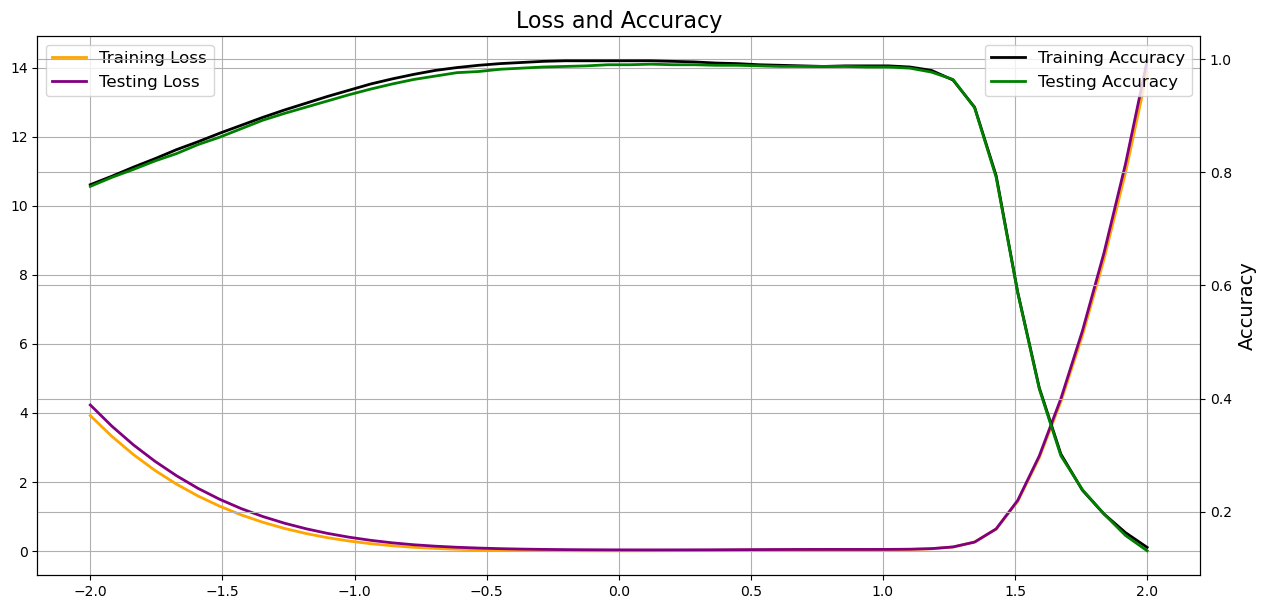

In [26]:
visualization.figure(figsize=(15, 7))
visualization.plot(alpha, alpha_train_loss_arr, color="orange", linewidth=2)
visualization.plot(alpha, alpha_test_loss_arr, color="purple", linewidth=2)
visualization.legend(['Training Loss', 'Testing Loss'], fontsize=12)
visualization.xlabel('', fontsize=14)
visualization.ylabel('', fontsize=14)
visualization.grid(True)

# Twin plot for Accuracy
visualization.twinx()
visualization.plot(alpha, alpha_train_acc_arr, color="black", linewidth=2)
visualization.plot(alpha, alpha_test_acc_arr, color="green", linewidth=2)
visualization.legend(['Training Accuracy', 'Testing Accuracy'], fontsize=12)
visualization.ylabel('Accuracy', fontsize=14)
visualization.title('Loss and Accuracy', fontsize=16)
visualization.grid(True)
visualization.show()
